# Introduction
***The*** ***Times Higher Education World University Ranking*** is widely regarded as one of the most influential and widely observed university measures. Founded in the United Kingdom in 2010, it has been criticized for its commercialization and for undermining non-English-instructing institutions.
***The Academic Ranking of World Universities***, also known as the Shanghai Ranking, is an equally influential ranking. It was founded in China in 2003 and has been criticized for focusing on raw research power and for undermining humanities and quality of instruction.
***The Center for World University Rankings***, is a less well know listing that comes from Saudi Arabia, it was founded in 2012.
> (Harvard University)
> 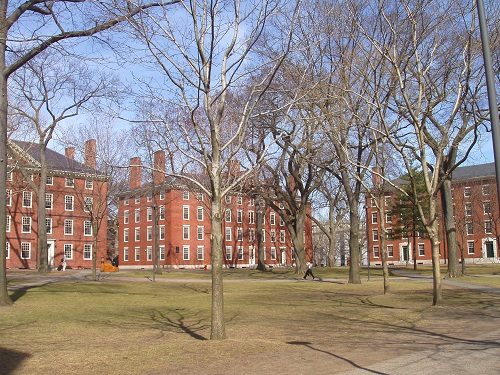                 
<font color = 'blue'>
    
Content:
1. [Import Necessary Libraries](#1)
2. [Load and Check Data](#2)
3. [Correlation Map](#3)
4. [Variable Description](#4)
  * [Matplotlib](#5)  
  * [Univariate Variable Analysis](#6) 
    * [Categorical Variable](#7)
    * [Numerical Variable](#8)
5. [Filtering](#9)
6. [List Comprehension](#10)
7. [Missing Data](#11)
8. [Outlier Detection](#12)

<a id = '1'></a>
## Import Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv
/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/cwurData.csv


<a id = '2'></a>
## Load and Check Data
We have three different ranking system for universities. We will use and observe all of them.

***The Center for World University Rankings***

In [2]:
cwurData = pd.read_csv('/kaggle/input/world-university-rankings/cwurData.csv')
print(cwurData.columns)
cwurData.head()

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


***The Academic Ranking of World Universities, also known as the Shanghai Ranking***

In [3]:
shanghaiData = pd.read_csv('/kaggle/input/world-university-rankings/shanghaiData.csv')
print(shanghaiData.columns)
shanghaiData.head()

Index(['world_rank', 'university_name', 'national_rank', 'total_score',
       'alumni', 'award', 'hici', 'ns', 'pub', 'pcp', 'year'],
      dtype='object')


,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


***The Times Higher Education World University Ranking***

In [4]:
timesData = pd.read_csv('/kaggle/input/world-university-rankings/timesData.csv')
print(timesData.columns)
timesData.head()

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


<a id = '3'></a>
## Correlation Map
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

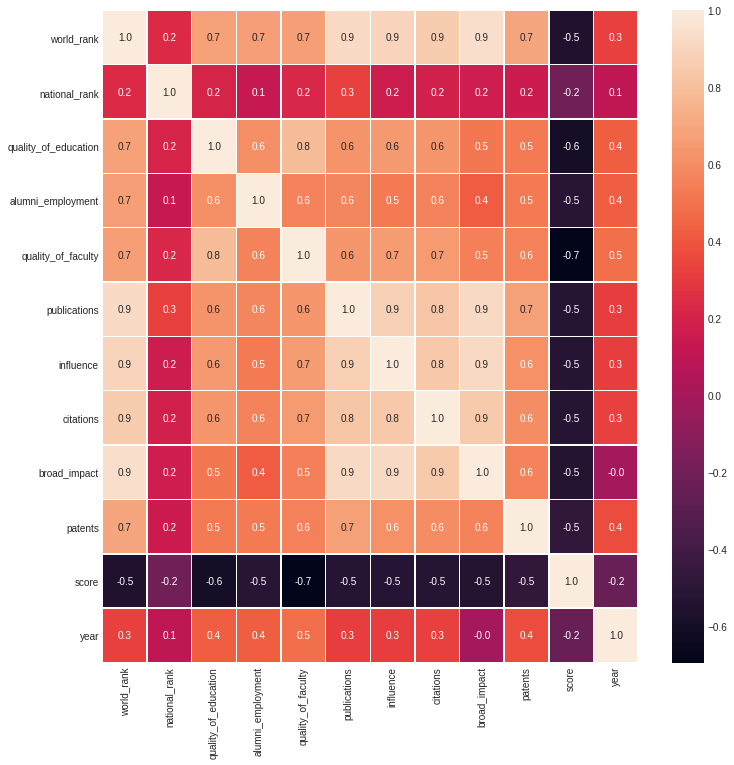

In [5]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cwurData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

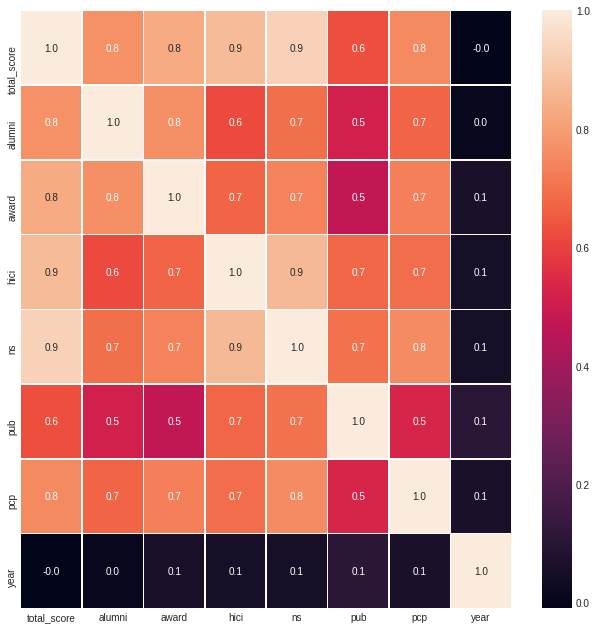

In [6]:
f,ax = plt.subplots(figsize=(11, 11))
sns.heatmap(shanghaiData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

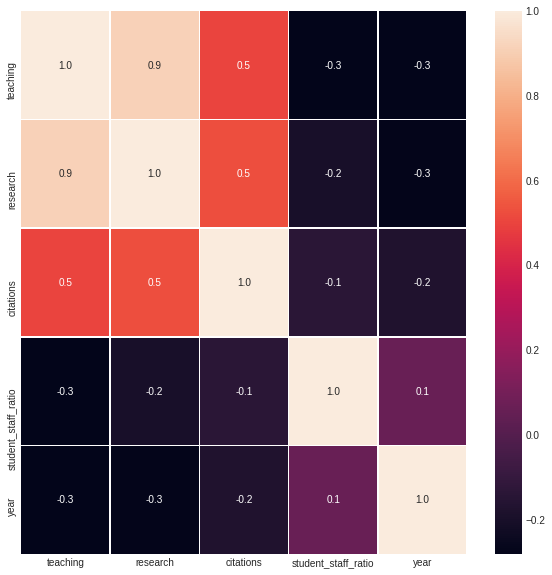

In [7]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(timesData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<a id = '4'></a>
## Variable Description for The Times Higher Education World University Ranking
* world_rank
* university_name
* country	
* teaching
* international
* research
* citations
* income
* total_score
* num_students
* student_staff_ratio
* international_students
* female_male_ratio
* year

<a id = '5'></a>
## MATPLOTLIB
Matplot is a python library that help us to plot data. The easiest and most basic plots are line, scatter and histogram plots.

* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables
* Histogram is better when we need to see distribution of numerical data.
* Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

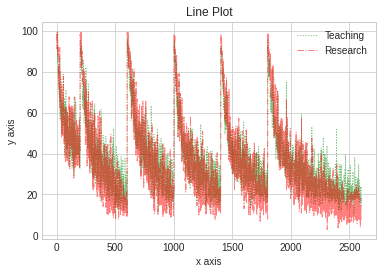

In [8]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
timesData.teaching.plot(kind = 'line', color = 'g',label = 'Teaching',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
timesData.research.plot(color = 'r',label = 'Research',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

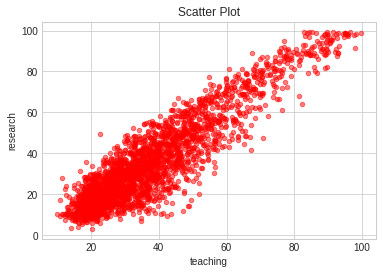

In [9]:
# Scatter Plot 
timesData.plot(kind='scatter', x='teaching', y='research',alpha = 0.5,color = 'red')
plt.xlabel('teaching')              # label = name of label
plt.ylabel('research')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

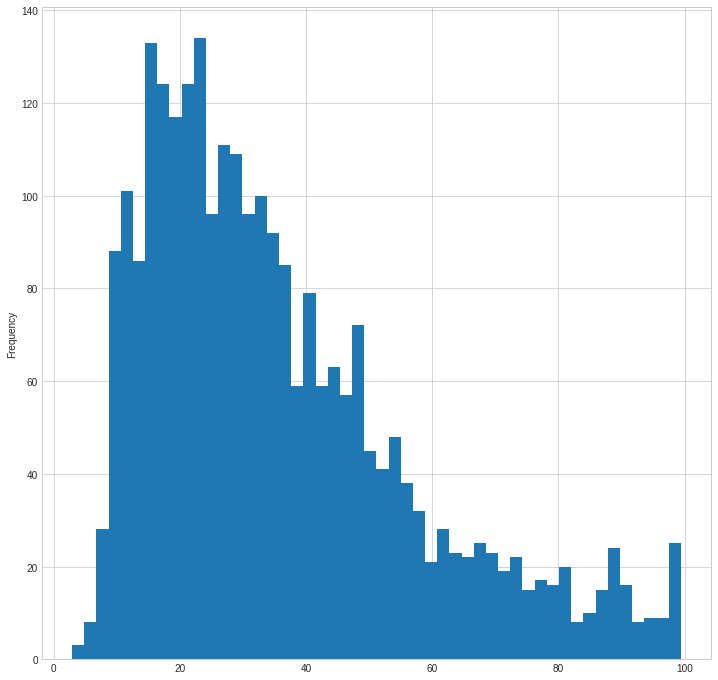

In [10]:
# Histogram
# bins = number of bar in figure
timesData.research.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

In [11]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

* float64(4): teaching, research, citations, and student_staff_ratio
* int64(1): year
* object(9): world_rank, university_name, country, international, income, total_score, num_student, international_students, and female_male_ratio

<a id = '6'></a>
## Univariate Variable Analysis
* Categorical Variable: country, international, university_name, world_rank
* Numerical Variable: teaching, research, citations, and student_staff_ratio

<a id = '7'></a>
### Categorical Variable

In [12]:
def bar_plot(dataset, variable):
    """
        input: dataset ex:timesData, variable example: "country" or "university_name"
        output: bar plot & value count
    """
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

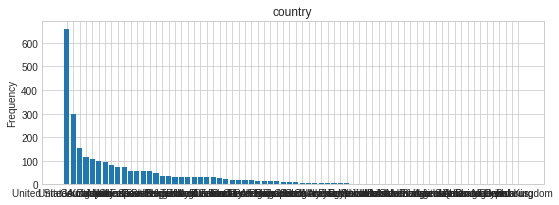

country: 
 United States of America    659
United Kingdom              300
Germany                     152
Australia                   117
Canada                      108
                           ... 
Ghana                         1
Cyprus                        1
Luxembourg                    1
Belarus                       1
Unted Kingdom                 1
Name: country, Length: 72, dtype: int64


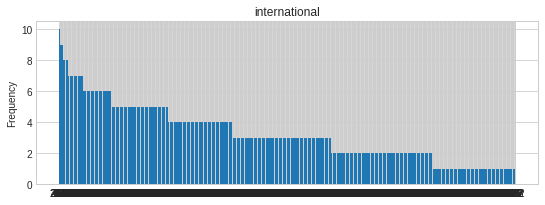

international: 
 20.7    10
29.6    10
46.8     9
34.3     9
48.4     9
        ..
72.9     1
85.2     1
91.2     1
96.8     1
60.2     1
Name: international, Length: 804, dtype: int64


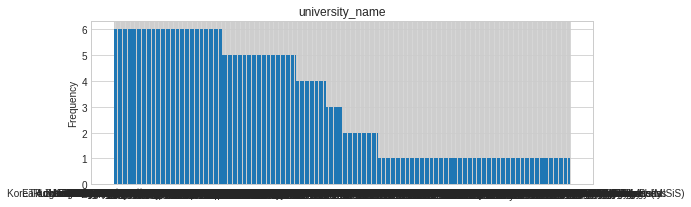

university_name: 
 University of Helsinki               6
Hong Kong Baptist University         6
University of Edinburgh              6
University of Arizona                6
University of Alberta                6
                                    ..
Feng Chia University                 1
Chulalongkorn University             1
Instituto Superior Técnico Lisboa    1
University of Limerick               1
Sichuan University                   1
Name: university_name, Length: 818, dtype: int64


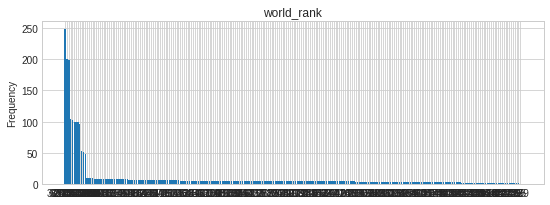

world_rank: 
 301-350    248
601-800    200
351-400    198
276-300    104
201-225    103
          ... 
=39          2
123          2
=99          2
=65          2
179          1
Name: world_rank, Length: 250, dtype: int64


In [13]:
category1 = ["country", "international", "university_name", "world_rank"]
for c in category1:
    bar_plot(timesData,c)

<a id = '8'></a>
### Numerical Variable

In [14]:
def plot_hist(dataset,variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

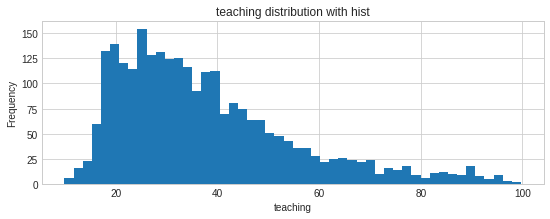

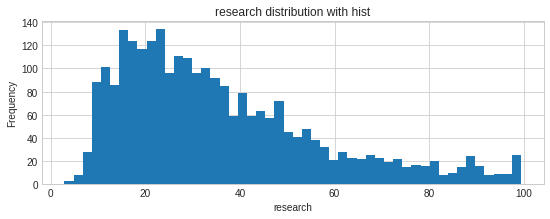

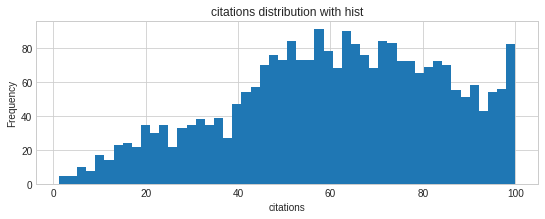

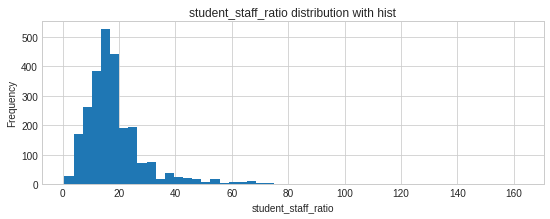

In [15]:
numericVar = ["teaching", "research", "citations", "student_staff_ratio"]
for n in numericVar:
    plot_hist(timesData,n)

<a id = '9'></a>
## Filtering

In [16]:
# 1 - Filtering Pandas data frame
x = shanghaiData['national_rank']=="1"
shanghaiData[x]

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
19,20,The University of Tokyo,1,46.7,36.0,14.4,38.5,52.1,86.5,34.7,2005
23,24,University of Toronto,1,43.1,28.1,19.7,39.3,38.9,76.7,41.9,2005
26,27,Swiss Federal Institute of Technology Zurich,1,41.7,40.2,37.0,35.1,41.1,43.4,52.4,2005
...,...,...,...,...,...,...,...,...,...,...,...
4766,301-400,University of Chile,1,NaN,7.3,0.0,0.0,11.1,33.0,17.1,2015
4773,301-400,University of Malaya,1,NaN,0.0,0.0,5.0,0.0,43.9,21.6,2015
4805,401-500,Cairo University,1,NaN,19.2,0.0,0.0,3.9,31.0,16.5,2015
4820,401-500,Istanbul University,1,NaN,13.6,0.0,0.0,3.4,34.1,17.2,2015


In [17]:
# 1 - Filtering Pandas data frame
x = cwurData['citations']<5
cwurData[x]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.00,2013
101,2,Stanford University,USA,2,11,2,4,6,2,2,NaN,11,93.94,2013
103,4,Massachusetts Institute of Technology,USA,3,2,16,2,16,3,3,NaN,1,91.45,2013
106,7,"University of California, Berkeley",USA,5,6,28,6,8,6,4,NaN,19,85.07,2013
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014


In [18]:
# 2 - Filtering pandas with logical_and
cwurData[np.logical_and(cwurData['quality_of_faculty']<20, cwurData['publications']<15 )]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012
19,20,"University of California, San Diego",USA,14,61,101,15,10,8,10,NaN,22,63.11,2012
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.00,2013
101,2,Stanford University,USA,2,11,2,4,6,2,2,NaN,11,93.94,2013
102,3,University of Oxford,United Kingdom,1,7,12,10,11,7,13,NaN,15,92.54,2013


In [19]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
shanghaiData[(shanghaiData['total_score']>70) & (shanghaiData['alumni']>50)]

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005
500,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.6,2006
501,2,University of Cambridge,1,72.6,96.3,91.5,53.8,59.5,67.1,66.5,2006
503,4,"University of California, Berkeley",3,72.1,70.6,74.5,70.5,72.2,71.9,53.1,2006
1000,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.0,2007
1002,3,"University of California, Berkeley",3,71.9,72.5,77.1,67.9,72.9,69.2,52.6,2007
1003,4,University of Cambridge,1,71.6,93.6,91.5,54.0,58.2,65.4,65.1,2007


<a id = '10'></a>
## LIST COMPREHENSİON
We use list comprehension for data analysis often.
list comprehension: collapse for loops for building lists into a single line
Ex: num1 = [1,2,3] and we want to make it num2 = [2,3,4]. This can be done with for loop. However it is unnecessarily long. We can make it one line code that is list comprehension.

In [20]:
# lets classify universities whether they have high or low teaching.
threshold = sum(timesData.teaching) / len(timesData.teaching)
timesData["ratio"] = ["high" if i > threshold else "low" for i in timesData.teaching]
timesData.loc[:10,["ratio","teaching"]] # we will learn loc more detailed later

,ratio,teaching
0,high,99.7
1,high,97.7
2,high,97.8
3,high,98.3
4,high,90.9
5,high,90.5
6,high,88.2
7,high,84.2
8,high,89.2
9,high,92.1


<a id = '11'></a>
## MISSING DATA
If we encounter with missing data, what we can do:
* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean

In [21]:
# Lets look at does cwurData data have nan value
# As you can see there are 2200 entries. However broad_impact has 2000 non-null object so it has 200 null object.
cwurData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [22]:
# Lets check broad_impact
cwurData["broad_impact"].value_counts(dropna =False)
# As you can see, there are 200 NAN value

NaN      200
642.0     21
849.0     20
800.0     19
809.0     17
        ... 
88.0       1
178.0      1
115.0      1
109.0      1
84.0       1
Name: broad_impact, Length: 344, dtype: int64

In [23]:
# Lets drop nan values
cwurData["broad_impact"].dropna(inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
cwurData["broad_impact"].value_counts(dropna =False)

642.0    21
849.0    20
800.0    19
715.0    17
850.0    17
         ..
61.0      1
160.0     1
128.0     1
45.0      1
65.0      1
Name: broad_impact, Length: 343, dtype: int64

As you see there are no NaN values anymore

<a id = '12'></a>
## Outlier Detection

In [24]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [25]:
timesData.loc[detect_outliers(timesData,["research","teaching","citations"])]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,ratio


There is no outlier

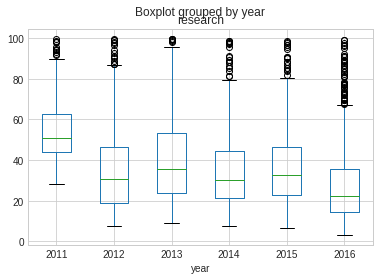

In [26]:
timesData.boxplot(column="research",by = "year")
plt.show()